<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.2 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [8]:
import pandas as pd
import numpy as np
import pandas as pd
import math
import seaborn as sns
import pandas as pd

from scipy import stats
from matplotlib import pyplot as plt


sns.set_context("poster")
sns.set(rc = {'figure.figsize' : (10,6)})
sns.set_style ("whitegrid")

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Find Dependent and Independent Variables to predict house price.

In [20]:
# Read CSV
data =pd.read_csv("../../DATA/Sacramento_transactions.csv")

In [21]:
data.shape

(985, 12)

In [23]:
data.head()

street        city    zip state  beds  baths  sq__ft  \
0      3526 HIGH ST  SACRAMENTO  95838    CA     2      1     836   
1       51 OMAHA CT  SACRAMENTO  95823    CA     3      1    1167   
2    2796 BRANCH ST  SACRAMENTO  95815    CA     2      1     796   
3  2805 JANETTE WAY  SACRAMENTO  95815    CA     2      1     852   
4   6001 MCMAHON DR  SACRAMENTO  95824    CA     2      1     797   

          type                     sale_date  price   latitude   longitude  
0  Residential  Wed May 21 00:00:00 EDT 2008  59222  38.631913 -121.434879  
1  Residential  Wed May 21 00:00:00 EDT 2008  68212  38.478902 -121.431028  
2  Residential  Wed May 21 00:00:00 EDT 2008  68880  38.618305 -121.443839  
3  Residential  Wed May 21 00:00:00 EDT 2008  69307  38.616835 -121.439146  
4  Residential  Wed May 21 00:00:00 EDT 2008  81900  38.519470 -121.435768

In [24]:
data.tail()

street             city    zip state  beds  baths  sq__ft  \
980   9169 GARLINGTON CT       SACRAMENTO  95829    CA     4      3    2280   
981      6932 RUSKUT WAY       SACRAMENTO  95823    CA     3      2    1477   
982    7933 DAFFODIL WAY   CITRUS HEIGHTS  95610    CA     3      2    1216   
983     8304 RED FOX WAY        ELK GROVE  95758    CA     4      2    1685   
984  3882 YELLOWSTONE LN  EL DORADO HILLS  95762    CA     3      2    1362   

            type                     sale_date   price   latitude   longitude  
980  Residential  Thu May 15 00:00:00 EDT 2008  232425  38.457679 -121.359620  
981  Residential  Thu May 15 00:00:00 EDT 2008  234000  38.499893 -121.458890  
982  Residential  Thu May 15 00:00:00 EDT 2008  235000  38.708824 -121.256803  
983  Residential  Thu May 15 00:00:00 EDT 2008  235301  38.417000 -121.397424  
984  Residential  Thu May 15 00:00:00 EDT 2008  235738  38.655245 -121.075915

In [26]:
data.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [30]:
# string Zip


data ['zip'] = data ['zip'].astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    object 
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 92.5+ KB


In [37]:
data['sale_data'] = pd.to_datetime (data['sale_date'].str.replace('EDT','UTC+4'))



data.head()

C:\Users\sharo\AppData\Local\Temp\ipykernel_6908\1693598412.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['sale_data'] = pd.to_datetime (data['sale_date'].str.replace('EDT','UTC+4'))


street        city    zip state  beds  baths  sq__ft  \
0      3526 HIGH ST  SACRAMENTO  95838    CA     2      1     836   
1       51 OMAHA CT  SACRAMENTO  95823    CA     3      1    1167   
2    2796 BRANCH ST  SACRAMENTO  95815    CA     2      1     796   
3  2805 JANETTE WAY  SACRAMENTO  95815    CA     2      1     852   
4   6001 MCMAHON DR  SACRAMENTO  95824    CA     2      1     797   

          type                     sale_date  price   latitude   longitude  \
0  Residential  Wed May 21 00:00:00 EDT 2008  59222  38.631913 -121.434879   
1  Residential  Wed May 21 00:00:00 EDT 2008  68212  38.478902 -121.431028   
2  Residential  Wed May 21 00:00:00 EDT 2008  68880  38.618305 -121.443839   
3  Residential  Wed May 21 00:00:00 EDT 2008  69307  38.616835 -121.439146   
4  Residential  Wed May 21 00:00:00 EDT 2008  81900  38.519470 -121.435768   

                  sale_data  
0 2008-05-21 00:00:00-04:00  
1 2008-05-21 00:00:00-04:00  
2 2008-05-21 00:00:00-04:00  
3 2008-05-21 00:00:00-04:00  
4 2008-05-21 00:00:00-04:00

In [39]:
data['day'] = data['sale_date']

data.head()

street        city    zip state  beds  baths  sq__ft  \
0      3526 HIGH ST  SACRAMENTO  95838    CA     2      1     836   
1       51 OMAHA CT  SACRAMENTO  95823    CA     3      1    1167   
2    2796 BRANCH ST  SACRAMENTO  95815    CA     2      1     796   
3  2805 JANETTE WAY  SACRAMENTO  95815    CA     2      1     852   
4   6001 MCMAHON DR  SACRAMENTO  95824    CA     2      1     797   

          type                     sale_date  price   latitude   longitude  \
0  Residential  Wed May 21 00:00:00 EDT 2008  59222  38.631913 -121.434879   
1  Residential  Wed May 21 00:00:00 EDT 2008  68212  38.478902 -121.431028   
2  Residential  Wed May 21 00:00:00 EDT 2008  68880  38.618305 -121.443839   
3  Residential  Wed May 21 00:00:00 EDT 2008  69307  38.616835 -121.439146   
4  Residential  Wed May 21 00:00:00 EDT 2008  81900  38.519470 -121.435768   

                  sale_data                           day  
0 2008-05-21 00:00:00-04:00  Wed May 21 00:00:00 EDT 2008  
1 2008-05-21 00:00:00-04:00  Wed May 21 00:00:00 EDT 2008  
2 2008-05-21 00:00:00-04:00  Wed May 21 00:00:00 EDT 2008  
3 2008-05-21 00:00:00-04:00  Wed May 21 00:00:00 EDT 2008  
4 2008-05-21 00:00:00-04:00  Wed May 21 00:00:00 EDT 2008

In [42]:
 data.describe().T

count           mean            std          min            25%  \
beds       985.0       2.911675       1.307932     0.000000       2.000000   
baths      985.0       1.776650       0.895371     0.000000       1.000000   
sq__ft     985.0    1314.916751     853.048243     0.000000     952.000000   
price      985.0  234144.263959  138365.839085  1551.000000  145000.000000   
latitude   985.0      38.607732       0.145433    38.241514      38.482717   
longitude  985.0    -121.355982       0.138278  -121.551704    -121.446127   

                     50%            75%            max  
beds            3.000000       4.000000       8.000000  
baths           2.000000       2.000000       5.000000  
sq__ft       1304.000000    1718.000000    5822.000000  
price      213750.000000  300000.000000  884790.000000  
latitude       38.626582      38.695589      39.020808  
longitude    -121.376220    -121.295778    -120.597599

In [43]:
data[data['beds']==0]

street             city    zip state  beds  baths  \
73              17 SERASPI CT       SACRAMENTO  95834    CA     0      0   
89           2866 KARITSA AVE       SACRAMENTO  95833    CA     0      0   
100     12209 CONSERVANCY WAY   RANCHO CORDOVA  95742    CA     0      0   
121       5337 DUSTY ROSE WAY   RANCHO CORDOVA  95742    CA     0      0   
126       2115 SMOKESTACK WAY       SACRAMENTO  95833    CA     0      0   
..                        ...              ...    ...   ...   ...    ...   
901  1530 TOPANGA LN Unit 204          LINCOLN  95648    CA     0      0   
917            501 POPLAR AVE  WEST SACRAMENTO  95691    CA     0      0   
934  1550 TOPANGA LN Unit 207          LINCOLN  95648    CA     0      0   
947     1525 PENNSYLVANIA AVE  WEST SACRAMENTO  95691    CA     0      0   
970             3557 SODA WAY       SACRAMENTO  95834    CA     0      0   

     sq__ft         type                     sale_date   price   latitude  \
73        0  Residential  Wed May 21 00:00:00 EDT 2008  206000  38.631481   
89        0  Residential  Wed May 21 00:00:00 EDT 2008  244500  38.626671   
100       0  Residential  Wed May 21 00:00:00 EDT 2008  263500  38.553867   
121       0  Residential  Wed May 21 00:00:00 EDT 2008  320000  38.528575   
126       0  Residential  Wed May 21 00:00:00 EDT 2008  339500  38.602416   
..      ...          ...                           ...     ...        ...   
901       0        Condo  Thu May 15 00:00:00 EDT 2008  138000  38.884150   
917       0  Residential  Thu May 15 00:00:00 EDT 2008  165000  38.584526   
934       0        Condo  Thu May 15 00:00:00 EDT 2008  188000  38.884170   
947       0  Residential  Thu May 15 00:00:00 EDT 2008  200100  38.569943   
970       0  Residential  Thu May 15 00:00:00 EDT 2008  224000  38.631026   

      longitude                 sale_data                           day  
73  -121.501880 2008-05-21 00:00:00-04:00  Wed May 21 00:00:00 EDT 2008  
89  -121.525970 2008-05-21 00:00:00-04:00  Wed May 21 00:00:00 EDT 2008  
100 -121.219141 2008-05-21 00:00:00-04:00  Wed May 21 00:00:00 EDT 2008  
121 -121.228600 2008-05-21 00:00:00-04:00  Wed May 21 00:00:00 EDT 2008  
126 -121.542965 2008-05-21 00:00:00-04:00  Wed May 21 00:00:00 EDT 2008  
..          ...                       ...                           ...  
901 -121.270277 2008-05-15 00:00:00-04:00  Thu May 15 00:00:00 EDT 2008  
917 -121.534609 2008-05-15 00:00:00-04:00  Thu May 15 00:00:00 EDT 2008  
934 -121.270222 2008-05-15 00:00:00-04:00  Thu May 15 00:00:00 EDT 2008  
947 -121.527539 2008-05-15 00:00:00-04:00  Thu May 15 00:00:00 EDT 2008  
970 -121.501879 2008-05-15 00:00:00-04:00  Thu May 15 00:00:00 EDT 2008  

[108 rows x 14 columns]

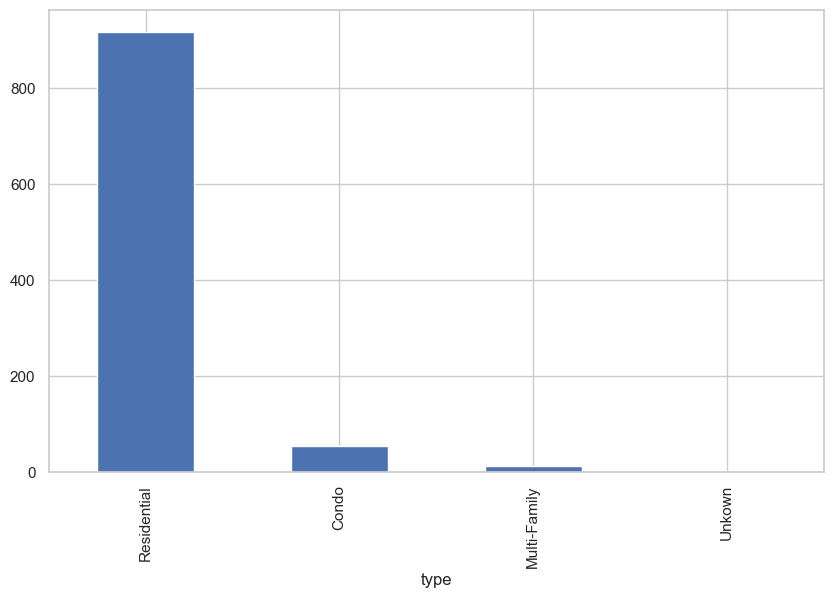

In [47]:
data['type'].value_counts().plot(kind ='bar')
plt.xlabel = "type of Building"


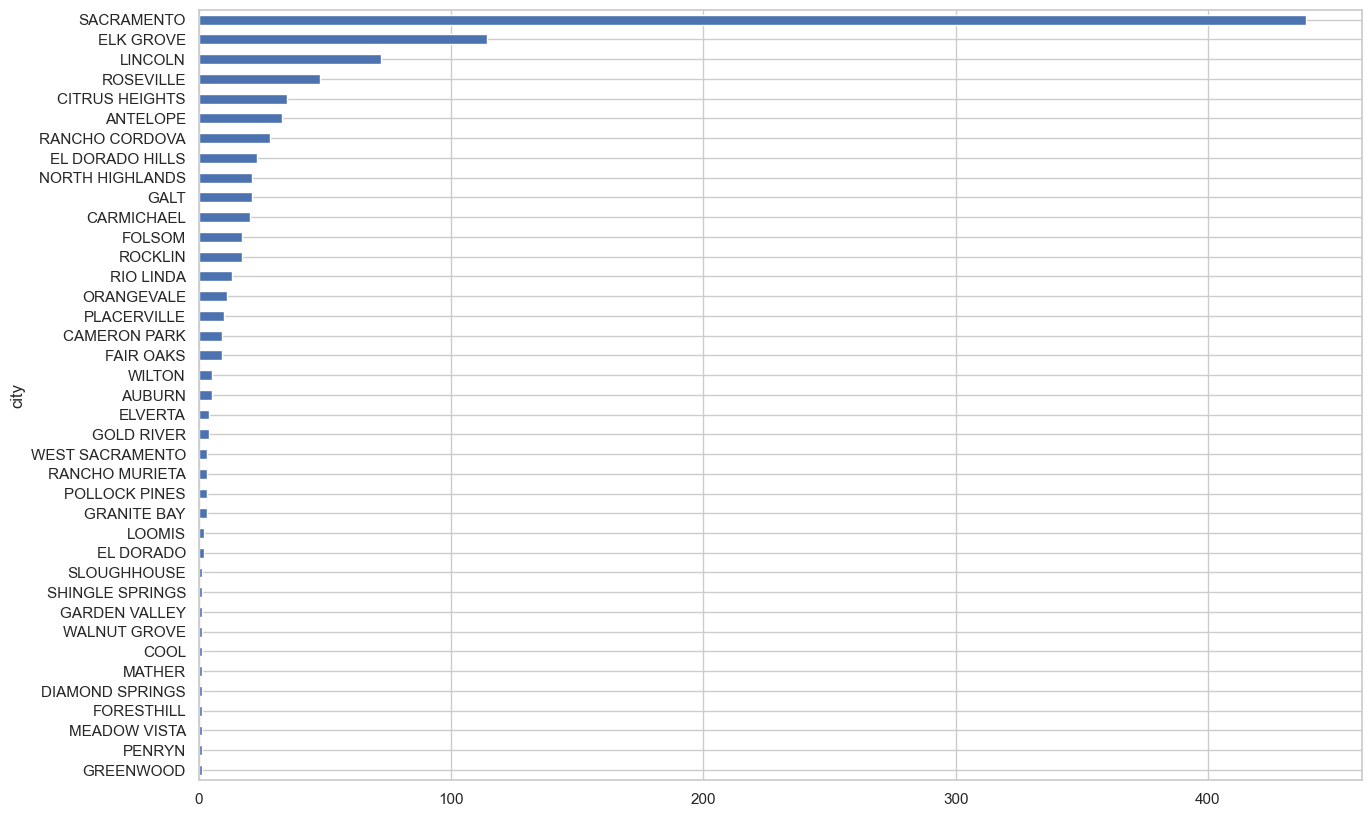

In [53]:
data ['city'].value_counts().sort_values().plot(kind = 'barh',figsize =(15,10));

In [56]:
data.loc[data['beds']== 0, 'type'] = 'Plot'

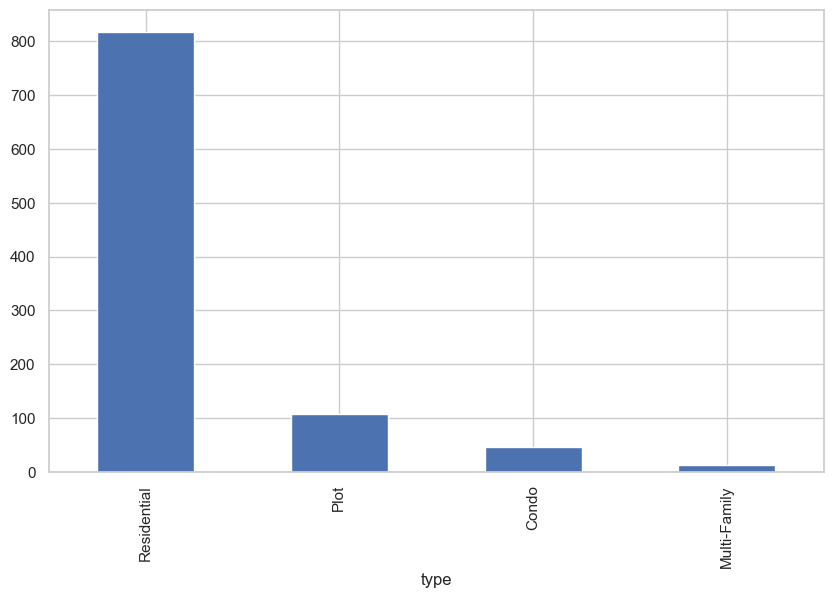

In [57]:
data['type'].value_counts().plot(kind ='bar')
plt.show()

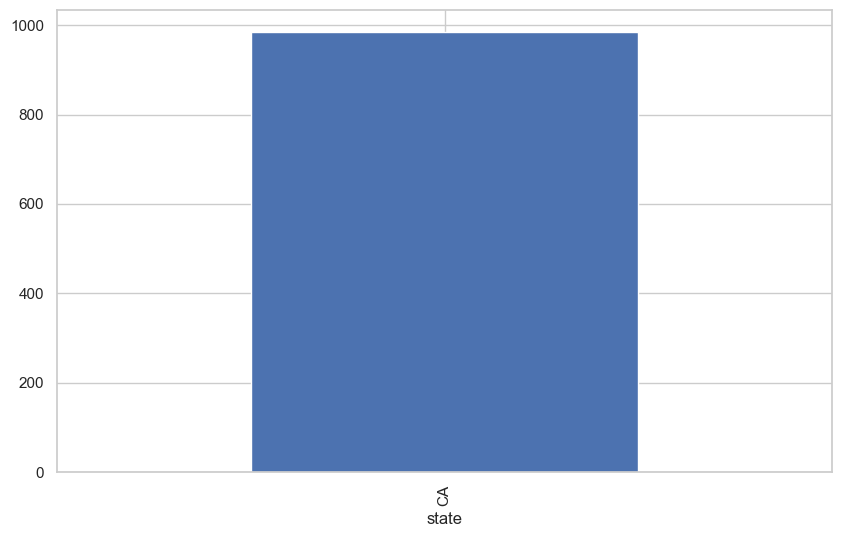

In [58]:
data['state'].value_counts().plot(kind= 'bar');

In [63]:
# folium 

import folium
import pandas as pd

m = folium.Map(location = [38.575764,-121.478851],titles = "Mapbox Bright" , zoom_start = 10)

for i in range ( 0,len(data.head(1000))):
    folium.Maker(
        location=[data.iloc[i]['latitute'],data.iloc[i]['longitude']]
    ).add_to(m)

AttributeError: module 'folium' has no attribute 'Maker'

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [ ]:
# ANSWER : Predicting price

#### 2.2 List all possible variables which might be Independent/Predictor variable.

In [64]:
# ANSWER : beds,baths,type,sqft

def draw_scatter_plot(X, Y):
    ### Plot the data
    # create a figure
    fig = plt.figure(figsize=(15,7))
    # get the axis of that figure
    ax = plt.gca()

    # plot a scatter plot on it with our data
    ax.scatter(X, Y, c='b')

    plt.show();


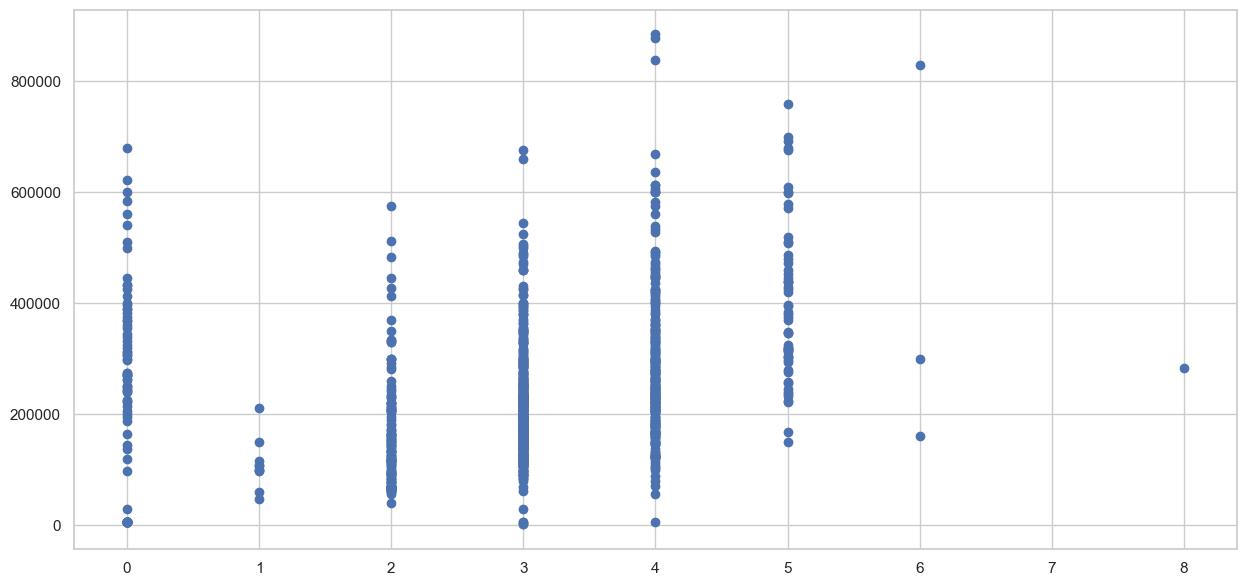

In [65]:
draw_scatter_plot(data['beds'], data['price'])

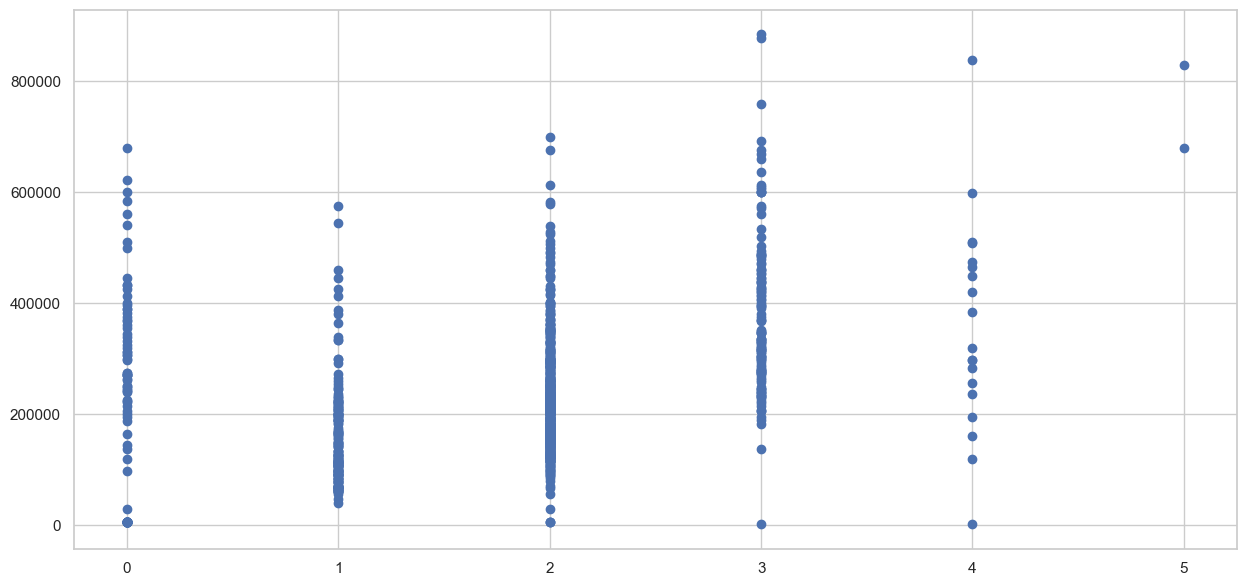

In [66]:
draw_scatter_plot(data['baths'], data['price'])

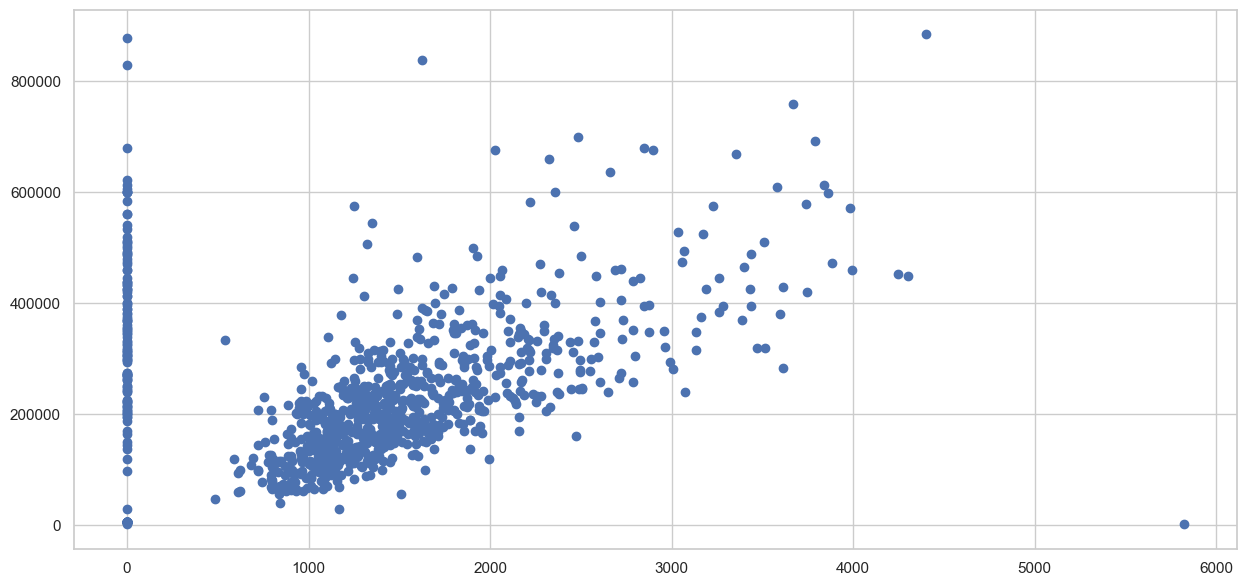

In [67]:
draw_scatter_plot(data['sq__ft'], data['price'])

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [78]:
# ANSWER
data.corr()

ValueError: could not convert string to float: '3526 HIGH ST'

#### 2.4 Find Coefficient and Intercept using Linear Regression

Using LinearRegression of sklearn.linear_model package find Coefficient and Intercept.

Create an instance of LinearRegression.

Explore following methods:

- fit
- predict
- score

In [73]:
from sklearn.linear_model import LinearRegression

##### 2.4.1 Fit predictor and target variables using linear regression 

In [79]:
# ANSWER

X = data['sq__ft'].values.reshape(-1,1)
Y = data['price']

linreg = LinearRegression()
linreg.fit(X,Y)

print(linreg.coef_, linreg.intercept_)

[54.15863969] 162930.16140699777


##### 2.4.2 Find R Score

Find $R^2$ Using ```score``` method of Linear Regression.

In [ ]:
# ANSWER

### 3. Splitting Data

In [72]:
from sklearn.model_selection import train_test_split

#### 3.1 Create training and testing subsets

Hint: Using `train_test_split` Library.

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
```

In [ ]:
# ANSWER
## Create training and testing subsets

#### 3.2 Check Shape, Sample of Test Train Data

In [ ]:
# ANSWER
## Check training/test data

#### 3.3 Using Linear Regression Find The Score

1. Fit model using X_train, y_train
2. Find score using X_test, y_test

In [ ]:
# ANSWER

In [ ]:
# ANSWER

### 4. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house using linear regression model.**

In [ ]:
# ANSWER

#### Find the error

In [ ]:
# Predict price from X_test



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



